## ImageNet UAP - Attack Generation
We generate (via SGD), visualize, and evaluate the following UAPs:
1. Untargeted UAP
2. Targeted UAP

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import torch

sys.path.append(os.path.realpath('..'))

from attacks import uap_sgd
from utils import loader_imgnet, model_imgnet, evaluate

dir_data = 'F:/tup/org/train/'
dir_uap = './'

loader = loader_imgnet(dir_data, 50000, 1) # adjust batch size as appropriate

In [2]:
# load model
model = model_imgnet('resnet50')

Model loading complete.


In [4]:
# clean accuracy
#_, _, _, _, outputs, labels = evaluate(model, loader )
#print('Accuracy:', sum(outputs == labels) / len(labels))

## 1. Untargeted UAP

In [3]:
nb_epoch = 1
eps = 10 / 255
beta = 12
step_decay = 0.7
#uap, losses = uap_sgd(model, loader, nb_epoch, eps, beta, step_decay)
uap= uap_sgd(model, loader, nb_epoch, eps, beta, step_decay)

epoch 1/1


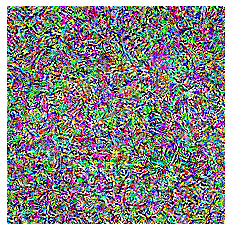

In [11]:
# visualize UAP
plt.axis('off')
plt.imshow(np.transpose(((uap / eps) + 1) / 2, (1, 2, 0)))
plt.savefig('uap.png', format='png', bbox_inches='tight',pad_inches = 0)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

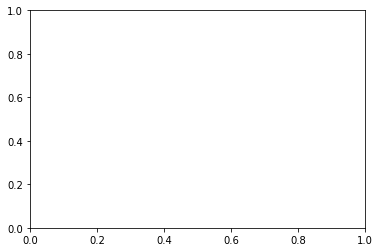

In [52]:
# plot loss
#plt.plot(losses)
#print(losses)

In [20]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, loader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))

Accuracy: 0.6372


## 2. Targeted UAP

In [19]:
nb_epoch = 10
eps = 10 / 255
y_target = 815
beta = 12
step_decay = 0.6
uap, losses = uap_sgd(model, loader, nb_epoch, eps, beta, step_decay, y_target = y_target)

epoch 1/10


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

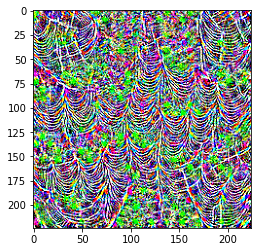

In [9]:
# visualize UAP
plt.imshow(np.transpose(((uap / eps) + 1) / 2, (1, 2, 0)))

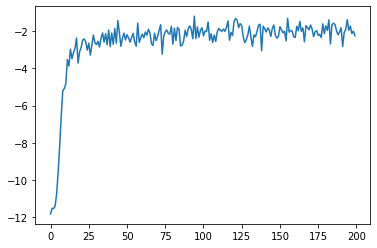

In [10]:
# plot loss
plt.plot(losses)

In [11]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, loader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))
print('Targeted success rate:', sum(outputs == y_target) / len(labels))

Accuracy: 0.1525
Targeted success rate: 0.756
